The RMS Titanic sank in the early morning hours of 15 April
1912 in the North Atlantic Ocean, four days into her maiden voyage from
Southampton to New York City. The largest ocean liner in service at the time,
Titanic had an estimated 2,224 people on board when she struck an iceberg at
around 23:40 on Sunday, 14 April 1912. Her sinking two hours and forty minutes
later at 02:20 (ship's time; 05:18 GMT) on Monday, 15 April, resulted in the
deaths of more than 1,500 people, making it one of the deadliest peacetime
maritime disasters in history. The details of the titanic passenger as
well as crew member is provided in the link: https://www.encyclopedia-titanica.org/titanic-survivors-list/

The same dataset is share with you in the
classroom, the dataset contains the following details- 1)Name of the customer
2) Occupation 3) Passenger class - (eg first class passenger / second class
passenger / third class passenger) 4) Details of the crew members 5) Age of
passengers / crew member 6) Whether they have survived the tragic event or not.

From the given dataset, you need to create a
classification model which will predict whether the particular person has
survived the tragic incident or not. And to create the model, you first have to
convert the dataset into appropriate form, e.g - remove the special characters,
remove null/duplicate entries, etc.

A decision tree should be constructed from the
given data.  More, to test the model if any new tuple assigned to it then,
it should be able to classify that the given detail of the person has actually
survived the incident or not.

Along with that try to analyze the given data by
answering the below mentioned questions:
       
What is the survival percentage of Crew
members ?
What is the survival percentage of first
class passengers?
Does age also play a role in survival ? How
can you say that ?

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
import graphviz



In [ ]:
# Loading Datasets

train_df = pd.read_csv('/content/drive/MyDrive/train.csv')#train.csv
test_df = pd.read_csv('/content/drive/MyDrive/test.csv')#test.csv

train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Removing the rows with missing values and duplicate values
train_df.dropna(inplace=True)
test_df.dropna(inplace=True)

train_df.drop_duplicates(inplace=True)
test_df.drop_duplicates(inplace=True)

In [ ]:
# Convert categorical variables to numerical
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked'])
train_df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,True,False,True,False,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,True,False,False,False,True
6,7,0,1,"McCarthy, Mr. Timothy J",54.0,0,0,17463,51.8625,E46,False,True,False,False,True
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",4.0,1,1,PP 9549,16.7000,G6,True,False,False,False,True
11,12,1,1,"Bonnell, Miss. Elizabeth",58.0,0,0,113783,26.5500,C103,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",47.0,1,1,11751,52.5542,D35,True,False,False,False,True
872,873,0,1,"Carlsson, Mr. Frans Olof",33.0,0,0,695,5.0000,B51 B53 B55,False,True,False,False,True
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",56.0,0,1,11767,83.1583,C50,True,False,True,False,False
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,True,False,False,False,True


In [ ]:
# Selecting features and label
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Sex_female', 'Embarked_C', 'Embarked_Q', 'Embarked_S']

x_train = train_df[features]
y_train = train_df['Survived']

x_test = test_df[features]
x_test

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Sex_female,Embarked_C,Embarked_Q,Embarked_S
12,1,23.0,1,0,82.2667,False,True,False,False,True
14,1,47.0,1,0,61.1750,False,True,False,False,True
24,1,48.0,1,3,262.3750,False,True,True,False,False
26,1,22.0,0,1,61.9792,False,True,True,False,False
28,1,41.0,0,0,30.5000,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...
404,1,43.0,1,0,27.7208,True,False,True,False,False
405,2,20.0,0,0,13.8625,True,False,True,False,False
407,1,50.0,1,1,211.5000,True,False,True,False,False
411,1,37.0,1,0,90.0000,False,True,False,True,False


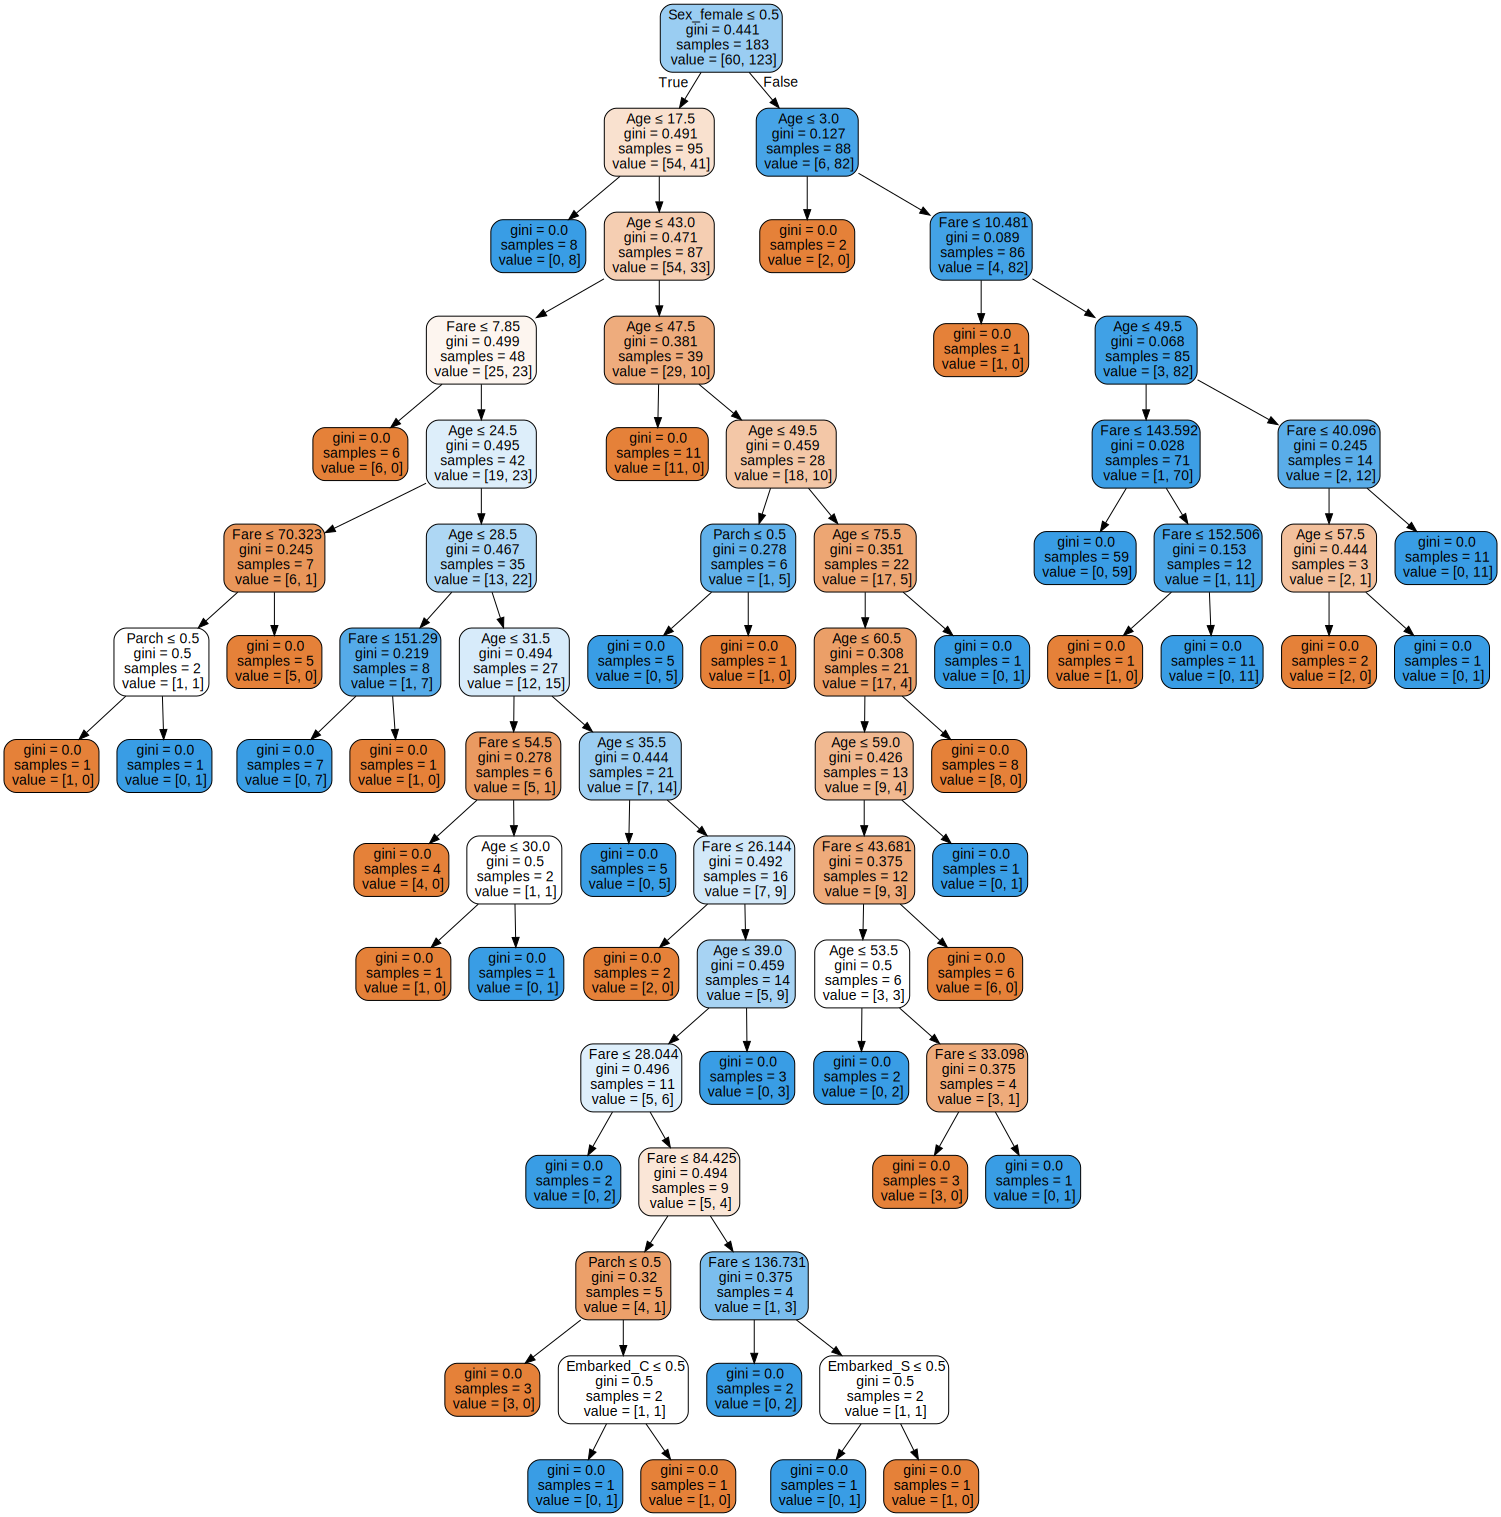

In [ ]:
clf = DecisionTreeClassifier()

# Training the decision tree model
clf.fit(x_train, y_train)

dot_data = export_graphviz(clf, out_file=None, feature_names=features, filled=True, rounded=True, special_characters=True)

# Visualize the decision tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")
graph

In [ ]:
# Perform prediciton on the testing data

y_pred = clf.predict(x_test)

predictions_df = pd.DataFrame({'PassengerId': test_df['PassengerId'], 'Survived': y_pred})

predictions_df

,PassengerId,Survived
12,904,1
14,906,1
24,916,1
26,918,1
28,920,1
...,...,...
404,1296,1
405,1297,0
407,1299,0
411,1303,1


In [ ]:
# Analysing the provided dataset
df = pd.read_csv('/content/drive/MyDrive/train.csv')
# Calculate survival percentage of crew
crew_s_percent = df[df['Cabin'].isnull()]['Survived'].mean() * 100
crew_s_percent

# Calculate survival percentage of first class passengers
fc_s_percent = df[df['Pclass'] == 1]['Survived'].mean() * 100
fc_s_percent

# Calculate average age of survivors and non-survivors
avg_age_s = df[df['Survived'] == 1]['Age'].mean()
avg_age_not_s = df[df['Survived'] == 0]['Age'].mean()

print("Survival Percentage of Crew Members:", crew_s_percent)
print("Survival Percentage of First Class Passengers:", fc_s_percent)
print("Average Age of Survivors:", avg_age_s)
print("Average Age of Non-Survivors:", avg_age_not_s)

Survival Percentage of Crew Members: 29.985443959243085
Survival Percentage of First Class Passengers: 62.96296296296296
Average Age of Survivors: 28.343689655172415
Average Age of Non-Survivors: 30.62617924528302
